$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}$

# Artificial Intelligence CS440 Project
** Learning How Neural Networks Work on the Real Scientific Data **

*by Nikolay Radaev*

<nik.radaev@gmail.com>

## Introduction

Artifical Intelligence can be complicated, unknown and even spooky. The Artificial Neural Networks is a method of AI field similar to biological neural networks that constitute animal brains. Such systems can learn progressively the tasks by considering examples.

I wanted to learn more about how Neural Networks work myself, excited to try it out and implement on the real scientific data. A very good source for machine learning data was given at one of the lectures and can be found at: https://archive.ics.uci.edu/ml/index.php page - it is the Irvine Machine Learning Repository by the University of California. There are a lot of good materials.

Heart Disease data https://archive.ics.uci.edu/ml/datasets/Heart+Disease attracted my attention. First, it has many parameters, used by scientists already in their researches widely, plus I was always interested in healthcare data analysis. These data sets have multiple inputs about an individual such as age, sex, blood pressure, cholesterol level, etc. I would like to use this information as an input for my training, so I can predict the data. I will also try to visualize the process and the data during the training, and see if I can find any correlations between whether or not an individual is likely to have heart disease. I will choose which data to use, but it is recommended to use at least 14 different inputs from either of sets.

Attribute Information:
Only 14 attributes used: 
1. (age) 
2. (sex) 
3. (cp) 
4. (trestbps) 
5. (chol) 
6. (fbs) 
7. (restecg) 
8. (thalach) 
9. (exang) 
10. (oldpeak) 
11. (slope) 
12. (ca) 
13. (thal) 
14. (num) (diagnosis of heart disease)

For the 14th is the diagnosis of heart disease (angiographic disease status) 
-- Value 0: < 50% diameter narrowing 
-- Value 1: > 50% diameter narrowing 
(in any major vessel: attributes 59 through 68 are vessels)

The Clevelend processed values seemed to be the most solid and completed repository. Let's use it with little data manipulations.
https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data

## Neural Networks taught simple

* The great helpful source for basic understanding about neural networks is video tutorial on YouTube at https://www.youtube.com/playlist?list=PLxt59R_fWVzT9bDxA76AHm3ig0Gg9S3So where in 12 series, step by step it is explained how neural networks work, what formulas and algorithms are used, how to train, visualize and test the data.


Basically, it can be illustrated as the following: it will be minimizing the total cost, finding perfect w1, w2, etc. and b for our z equation, which will be producing output with help of custom sigmoid function (depending on the range of data output) and then comparing it to the known target value:

![Image of Filter](http://i68.tinypic.com/c0qi9.jpg) 

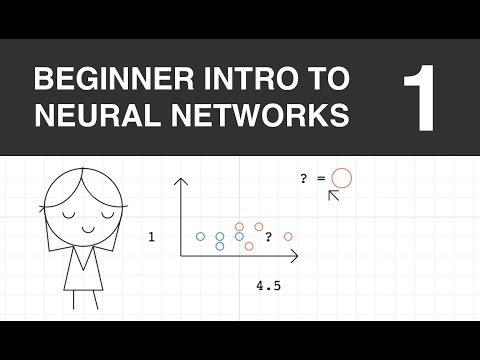

In [363]:
from IPython.display import YouTubeVideo
YouTubeVideo('ZzWaow1Rvho')

## Methods

Here are the methods, tools and libary that will be used for my Neural Network project:
* Jupyter Notebook with Python version 3.x as a Toolset has the ability to manipulate the data, write our own code and visualize the results.
* I will parse and perform computations on the data using numpy library and matplotlib.pyplot for plotting.
* I am also planning to use Neural Network and Neural Network Classifier classes given and learned at CS 440 Artifical Intelligence course from here: http://www.cs.colostate.edu/~anderson/cs440/notebooks/nn2.tar or it can be downloaded from my Dropbox public folder at: https://www.dropbox.com/s/g4f25wy1n5gbq6z/nn2.tar
* My goal is to get more familiar with Neural Network and remember the methods we were using in class and understand them the best I could. 

## Possible Results

* I would like to find our linear function values, and plot various outputs and processes: such as error curve, and various pictures as we are interested in 2-dimensional representation with coloring or transparency of the objects. I will also try to draw the data points (layers) of our neural network.

* I am also planning to test my neural network with some random data (or real data), run it and see the prediction of having a heart disease.

## Parsing the data

I have downloaded Cleveland Heart Disease data, combined into one document, spread it into columns in excel document, and parsed into different data structures. 

* I had to massage data in excel a little bit for integrity.

* Here is what each data column will represent:

![Image of Filter](http://i66.tinypic.com/20pevmb.jpg)

* Source: http://csjournals.com/IJCSC/PDF7-1/18.%20Tejpal.pdf

* Saving into a file:
![Image of Filter](http://i67.tinypic.com/f9qrys.jpg)

* The result can be downloaded from here: https://www.dropbox.com/s/0r4cf6i7pmlm4c6/heart_disease.csv

Total rows: 303.
Columns, total: 14 (13 for input, 1 for ouput value).

Ok let's parse the columns we will need

In [364]:
# First there are the libraries we might need

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from copy import copy
import time
import numbers

import neuralnetworks as nn

#replacing '?' with 0s
def conv(x):
    return x.replace('?', '0').encode()



In [365]:
Tdata = np.genfromtxt((conv(x) for x in open('heart_disease.csv')), dtype=float, delimiter=(','), usecols=13, skip_header=1, unpack=True)
Xdata = np.genfromtxt((conv(x) for x in open('heart_disease.csv')), dtype=float, delimiter=(','), usecols=range(0, 13), skip_header=1, unpack=True)
fornames = np.genfromtxt((conv(x) for x in open('heart_disease.csv')), dtype=str, delimiter=(','), usecols=range(0, 14), max_rows = 1, unpack=True)

In [366]:
names = []
for x in fornames:
    names.append(x)
    
names

['Age',
 'Sex 1 M 0 F',
 'Chest Pain Type',
 'Blood Pressure',
 'Serum Cholesterol',
 'Fasting Blood Sugar',
 'Resting Electrographic Results',
 'Maximum Heart Rate Achieved',
 'Exercise Induced Angina',
 'ST Depression Induced by Exercise Relative to Rest',
 'Slope of Peak Exercise ST Segment',
 'Number of Major Vessels Colored by Floursopy',
 'Thal Real',
 'Class Label Representing Four Type of Heart Disease']

In [367]:
Xdata = np.transpose(Xdata)
print(Xdata.shape)

(303, 13)


In [368]:
Xdata[5][4]

236.0

Yes!

In [369]:
Tdata = Tdata.reshape(1, -1)
Tdata

array([[ 0.,  2.,  1.,  0.,  0.,  0.,  3.,  0.,  2.,  1.,  0.,  0.,  2.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  3.,  4.,  0.,
         0.,  0.,  0.,  3.,  0.,  2.,  1.,  0.,  0.,  0.,  3.,  1.,  3.,
         0.,  4.,  0.,  0.,  0.,  1.,  4.,  0.,  4.,  0.,  0.,  0.,  0.,
         2.,  0.,  1.,  1.,  1.,  1.,  0.,  0.,  2.,  0.,  1.,  0.,  2.,
         2.,  1.,  0.,  2.,  1.,  0.,  3.,  1.,  1.,  1.,  0.,  1.,  0.,
         0.,  3.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  0.,  0.,  1.,  2.,  3.,  0.,  0.,  0.,  0.,  0.,  0.,
         3.,  0.,  2.,  1.,  2.,  3.,  1.,  1.,  0.,  2.,  2.,  0.,  0.,
         0.,  3.,  2.,  3.,  4.,  0.,  3.,  1.,  0.,  3.,  3.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  4.,  3.,  1.,  0.,  0.,  1.,  0.,
         1.,  0.,  1.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  4.,  3.,  1.,
         1.,  1.,  2.,  0.,  0.,  4.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  3.,  0.,  1.,  0.,  4.,  1.,  0.,  1.

In [370]:
Xdata

array([[ 63.,   1.,   1., ...,   3.,   0.,   6.],
       [ 67.,   1.,   4., ...,   2.,   3.,   3.],
       [ 67.,   1.,   4., ...,   2.,   2.,   7.],
       ..., 
       [ 57.,   1.,   4., ...,   2.,   1.,   7.],
       [ 57.,   0.,   2., ...,   2.,   1.,   3.],
       [ 38.,   1.,   3., ...,   1.,   0.,   3.]])

In [371]:
Tdata = np.transpose(Tdata)

In [372]:
Xdata.shape, Tdata.shape

((303, 13), (303, 1))

In [373]:
Xdata.shape[1]

13

In [374]:
Tdata.shape[1]

1

## Now train our Neural Network

I am going to use a non-Classified Neural Network method, using 0 to 4 as a range for predicted output. I could also convert it to 0 - 1 range, but it is not neccessary.

Error is:  3.06787885714e-05


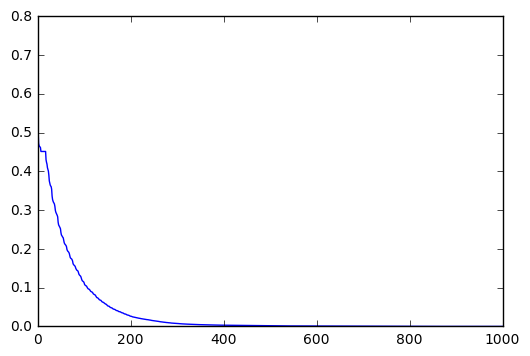

In [375]:
nnet = nn.NeuralNetwork(Xdata.shape[1], 100, Tdata.shape[1])

nnet.train(Xdata, Tdata, 1000)

plt.plot(nnet.getErrorTrace())

print("Error is: ", nnet.getErrorTrace()[1000])

Error is:  0.128384970526


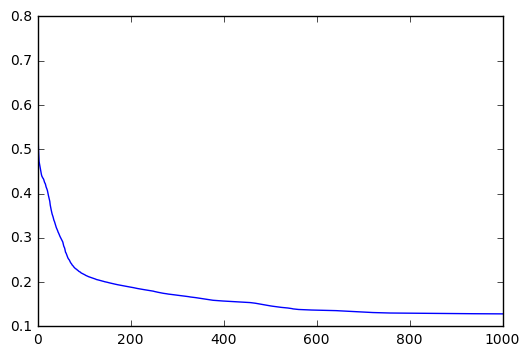

In [376]:
nnet = nn.NeuralNetwork(Xdata.shape[1], 12, Tdata.shape[1])

nnet.train(Xdata, Tdata, 1000)

plt.plot(nnet.getErrorTrace())

print("Error is: ", nnet.getErrorTrace()[1000])

## What do I see

When I had 1000 layers in Neural Network, the error was almost zero. It is too ideal and I am more intersested on the random / live data. So the better picture can be seen. 12 layers were optimal. 1000 iterations were good enough too.

Let's plot how close we are to the real data versus predicted.

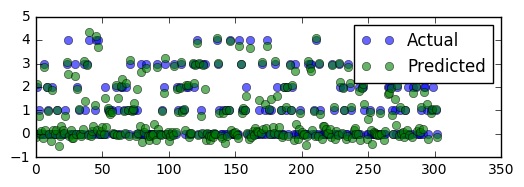

In [377]:
Pdata = nnet.use(Xdata)

plt.subplot(2,1,1)
plt.plot(np.hstack((Tdata, Pdata)), 'o', alpha = 0.6)
plt.legend(('Actual','Predicted'))

Green and blue spot are not overlapping each other, but still close. That's what I need!

Let's plot the known discrete output data with range (0-4).

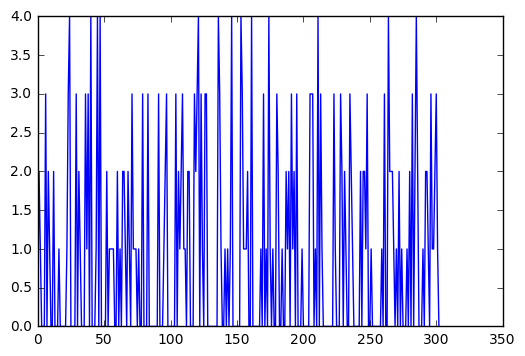

In [378]:
plt.plot(Tdata)

Let's plot the predicted data.

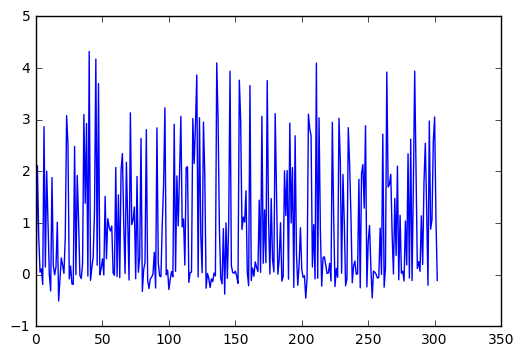

In [379]:
plt.plot(Pdata)

It is a little noisy, but  looks rich.

As we can see, predicted values are almost as identical as known output for Heart Disease Diagnose. So, let's use the Predicted values (Pdata) for displaying Heart Disease results along with the input (Xdata).

## Seeing Neural Network

2.24610577483 0.00907610258864 400.0


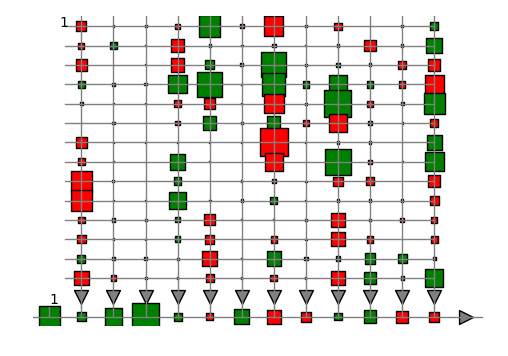

In [380]:
nnet.draw()

## Let's create a human

Now let's create a human that would be very close to individual from the table.

In [381]:
#50	1	4	150	243	0	2	125	0	2.6	2	0	7	4
Human = np.array([[50, 1, 4, 150, 250, 0, 2, 124, 0, 2.7, 2, 0, 7]])
Human

array([[  50. ,    1. ,    4. ,  150. ,  250. ,    0. ,    2. ,  124. ,
           0. ,    2.7,    2. ,    0. ,    7. ]])

In [382]:
Prisk = nnet.use(Human)
Prisk

array([[ 3.72752527]])

Looks like a candidate for Heart Disease Stage # 4.

Let's try one more example, more imaginary.

In [383]:
Human2 = np.array([[60, 0, 3, 120, 200, 1, 1, 110, 0, 2.5, 1, 0, 4]])
Human2

array([[  60. ,    0. ,    3. ,  120. ,  200. ,    1. ,    1. ,  110. ,
           0. ,    2.5,    1. ,    0. ,    4. ]])

In [384]:
Prisk2 = nnet.use(Human2)
Prisk2

array([[-1.42708313]])

No candidate for a Heart Disease diagnoss.

## Let's plot the data in deep

Now we would like to plot a deeper picture with a few parameters.

In [385]:
#first we would like to extract them so we can iterate among them while plotting

#age
ages = []
for age in Xdata:
    ages.append(age[0])
    
#sex
genders = []
for g in Xdata:
    genders.append(float(g[1]))

#cholesterol level
serumcoles = []
for c in Xdata:
    serumcoles.append(float(c[4]))
    
#blood pressure
bloodpressure = []
for b in Xdata:
    bloodpressure.append(float(b[3]))

#predicted values
predict = []
for scal in Pdata:
    predict.append(np.asscalar(scal))

How about just showing on x  ages and heart blood pressure type on axis y.

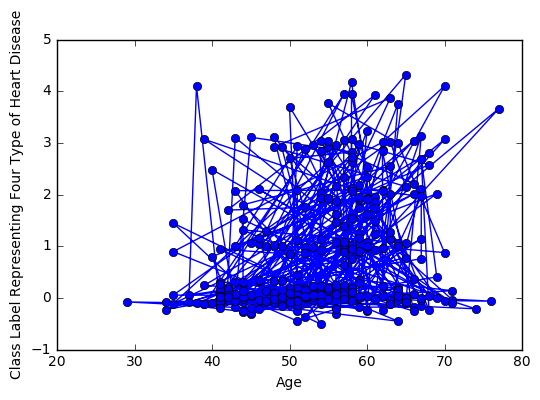

In [386]:
plt.plot(ages, Pdata, 'o-')
plt.xlabel(names[0])
plt.ylabel(names[13])

Interesting, we can see the dense spots at what age most diagnoses were issued but still not very clear.

Let's add a new dimension - cholesterol, indicate gender with colors, remove lines, and assign transparency to predicted value.

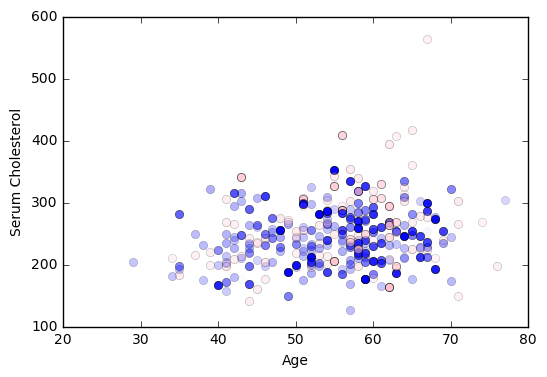

In [387]:
colors = ["pink", "blue"]

#plt.plot(ages, Pdata, 'o', alpha = 0.5)
for x in range (len(predict)):
    plt.plot(ages[x], serumcoles[x], 'o', color = colors[int(genders[x])], alpha = predict[x] * 0.25 + 0.25)
plt.xlabel(names[0])
plt.ylabel(names[4])

Ok, now we see the dence area somewhere closer to 60 y.o. and cholesterol level 200-300.

Let's introduce blood pressure (column of index 3 in our data), plotting circles of different size (area) indicating this value.

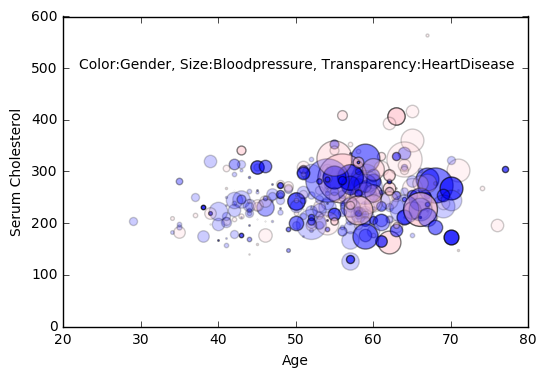

In [388]:
for x in range (len(predict)):
    plt.scatter(ages[x], serumcoles[x], s=(abs(bloodpressure[x] - 100)**3 / 800), c=colors[int(genders[x])], alpha = abs(int(predict[x])*0.15 + .2))
plt.xlabel(names[0])
plt.ylabel(names[4])
plt.text(22,500,'Color:Gender, Size:Bloodpressure, Transparency:HeartDisease')

I definately see the spots of risky areas of mostly the male individuals. Blood pressure matters, but not so much as gender or age.

## Lets train our network using a classifier
And see if it also works.

Error is:  0.128384970526


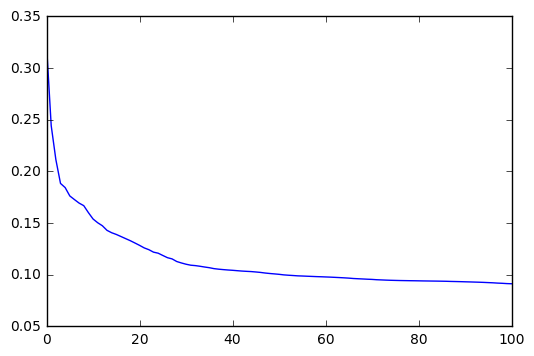

In [389]:
#I will chose the optimal depth of neural network and iterations

classNN = nn.NeuralNetworkClassifier(Xdata.shape[1], 5, 5)

classNN.train(Xdata, Tdata, 100)

plt.plot(classNN.getErrorTrace())

print("Error is: ", nnet.getErrorTrace()[1000])

In [390]:
Pdata = classNN.use(Xdata)
for x in Pdata:
    print(x, end = '')

[ 0.][ 2.][ 2.][ 0.][ 0.][ 0.][ 3.][ 0.][ 2.][ 1.][ 0.][ 0.][ 2.][ 0.][ 0.][ 0.][ 1.][ 0.][ 0.][ 0.][ 0.][ 0.][ 1.][ 2.][ 2.][ 0.][ 0.][ 0.][ 0.][ 3.][ 0.][ 2.][ 1.][ 0.][ 0.][ 0.][ 3.][ 3.][ 1.][ 0.][ 3.][ 0.][ 0.][ 0.][ 0.][ 4.][ 0.][ 3.][ 0.][ 0.][ 0.][ 0.][ 1.][ 0.][ 1.][ 3.][ 1.][ 1.][ 0.][ 0.][ 1.][ 0.][ 2.][ 0.][ 2.][ 2.][ 1.][ 0.][ 2.][ 1.][ 0.][ 2.][ 1.][ 1.][ 1.][ 0.][ 2.][ 0.][ 0.][ 1.][ 1.][ 0.][ 0.][ 3.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 3.][ 2.][ 0.][ 0.][ 1.][ 3.][ 3.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 3.][ 0.][ 1.][ 1.][ 2.][ 1.][ 1.][ 3.][ 0.][ 2.][ 2.][ 0.][ 0.][ 0.][ 2.][ 2.][ 3.][ 3.][ 1.][ 3.][ 1.][ 0.][ 3.][ 3.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 4.][ 3.][ 1.][ 0.][ 0.][ 1.][ 0.][ 1.][ 0.][ 0.][ 3.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 2.][ 3.][ 1.][ 1.][ 1.][ 2.][ 0.][ 0.][ 1.][ 0.][ 0.][ 0.][ 0.][ 0.][ 0.][ 1.][ 0.][ 2.][ 1.][ 1.][ 0.][ 3.][ 1.][ 0.][ 3.][ 0.][ 0.][ 3.][ 2.][ 0.][ 0.][ 1.][ 0.][ 0.][ 1.][ 1.][ 3.][ 0.][ 3.][ 3.][ 3.][ 0.][ 3.][ 0.][ 0.][ 0.][ 1.]

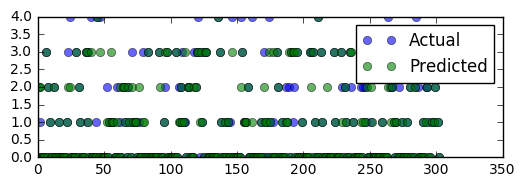

In [391]:
plt.subplot(2,1,1)
plt.plot(np.hstack((Tdata, Pdata)), 'o', alpha = 0.6)
plt.legend(('Actual','Predicted'))

So our classes are now distinguisibable (discreet values). And randomness also exists, but along the x axis.

2.39522468864 0.0531214426194 692.520775623


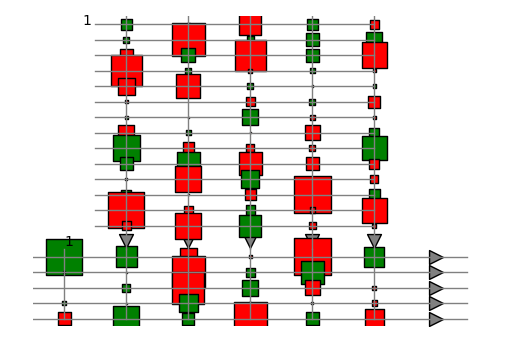

In [392]:
classNN.draw()

Neural Network output also looks discreet (4 clear categories for heart disease diagnosis) as opposed  to non-classified, one range output.

Viewing data Likehood

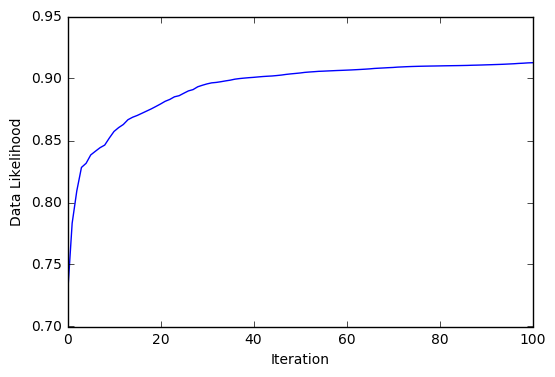

In [393]:
plt.plot(np.exp(-classNN.getErrorTrace()))
plt.xlabel('Iteration')
plt.ylabel('Data Likelihood')

Slightly over 90% - a very good result with just 100 iterations.

## Conclusion

It is beneficial to see Neural Networks in action, and how they can be used on the real data. There are a lot of tools available today for AI, which means there is no need to 'invent the wheel'. Just the understanding how it works, chose the appropriate library, set your goals, play, see the results, repeat.

However, even with a good amount of data, the predictions made by Artificial Intelligence or the symptoms themselves, may not be accurate or match the actual measured diagnoses, and also there is not much of a correlation (or a clear picture) with the input data. Healthcare is a complex industry and AI is approaching to be able to benefit it. More amount of gathered information might help in Artificial Neural Networks learning, but the hard work of doctors and medical professionals still win today. There is more healthcare data every day that we can try on and see it for ourselves.

The data I trained my Neural Networks with today is from 1988. Using the past we can make the future better and this is just the beginning.

In [394]:
import io
from nbformat import current
import glob
nbfile = glob.glob('*.ipynb')
if len(nbfile) > 1:
    print('More than one ipynb file. Using the first one.  nbfile=', nbfile)
with io.open(nbfile[0], 'r', encoding='utf-8') as f:
    nb = current.read(f, 'json')
word_count = 0
for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        word_count += len(cell['source'].replace('#', '').lstrip().split(' '))
print('Word count for file', nbfile[0], 'is', word_count)

Word count for file radaev-project.ipynb is 1312
